# LOG6302A — Analyse d’applications et Cyber-sécurité<br>Laboratoire #6

**Quentin Guidée (2206809), Nam Vu (2230468)**

Polytechnique Montréal – Hiver 2024


In [18]:
import tempfile
from pathlib import Path

from graphviz import Source
from IPython.display import Image

from code_analysis import ASTReader, Graph, AST, AST_fragmentation

In [19]:
reader = ASTReader()


def show_graph(graph: Graph):
    """Afficher le graphe dans Jupyter"""
    dot = graph.to_dot()
    s = Source(dot)
    with tempfile.NamedTemporaryFile(suffix=".png") as f:
        s.render(f.name, format="png")
        display(Image(f.name + ".png"))

In [20]:
path_ast = Path("ast")


def get_kits():
    return [dir_kit for dir_kit in path_ast.iterdir() if dir_kit.is_dir()]


def get_kit_asts(kit: Path):
    return [reader.read_ast(file.as_posix()) for file in kit.glob("**/*.ast.*")]


all_kits_asts = {kit: get_kit_asts(kit) for kit in get_kits()}

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.256375 to fit


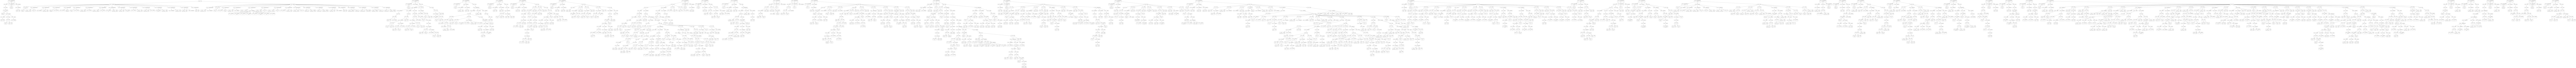

In [42]:
sample_ast = list(all_kits_asts.values())[40][0]

show_graph(sample_ast)

In [43]:
sample_ast.vectorize()

array([  0,   0,   0,   0, 122, 220,   0,   0,  33,  74, 302,  70,   0,
         0,   0,   0,   0,   5,   0,   0,   4,   2,   2,   0,  51,   9,
         9,   9,  10,   0,   0,   0,   0,   0,   3,   0,   0,   2,   2,
         0,   0,   5,   0,   1,   2,  78,   0,   0,   0,   0,   0, 263,
         0,   2,  10,  22,   0,   0,   0,   1,   1,   3,   0,  62,   0,
         0,   0,   6,   0,  44,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   5,  36,   0,   0,   7,   3,   0,   0,  19,  31,   0,   0,
         0,   0,   2,   5,   0,  23,   0,   0,  39,   0,   0,   0,  36,
         1,  54,   0,   2,  11, 167,   0,   0,   0,   6,   0,   0,   0,
        16,   0,   0,   0,   0,  41, 528,   0,   0,   2])

In [68]:
asts: list[int] = AST_fragmentation(sample_ast)


sample_ast.vectorize()

[1132065620,
 1132065601,
 1132065536,
 1132065400,
 1132065339,
 1132065284,
 1132065483,
 1132065464,
 1132065417,
 1132065102,
 1132065078,
 1132065067,
 1132064942,
 1132063547,
 1132063662,
 1132063317,
 1132063300,
 1132063248,
 1132063479,
 1132063200,
 1132064629,
 1132064608,
 1132064563,
 1132064729,
 1132064700,
 1132064679,
 1132064657,
 1132064640,
 1132064492,
 1132064475,
 1132064466,
 1132064433,
 1132064418,
 1132064401,
 1132063969,
 1132063944]

# 1.1. Clones paramétriques

In [131]:
asts: list[int] = []
ast_distances = {}

for kit in all_kits_asts.values():
    for ast in kit:
        if len(ast.get_node_ids()) < 100:
            continue
        fragments: list[int] = AST_fragmentation(ast)
        AST_fragmentation(ast)
        for fragment in fragments:
            ast.set_root(fragment)
            ast_distances[fragment] = ast.vectorize()

ast_distances

{889615454: array([   0,    0,    0,    0, 2805, 3399,    7,    0,  229, 1657, 4233,
         591,    0,    0,   54,   60,    6,    4,    1,    0,   15,    5,
           5,    0,  800,  102,  102,  102,    0,   12,    0,    4,    0,
           1,    0, 1181,    0,   43,   32,    0,    1,  143,    1,   69,
          40, 1032,   13,   12,    0,    0,   20, 2173,   20,   12,  220,
         321,    0,    2,    1,   69,   69,    0,    0,  394,    0,    0,
           0,  285,    0,  575,    2,    0,    0,    0,   81,    0,    0,
           0,    5,   27,   84,    0,    0,   81,    0,    0,    0,    6,
           5,    0,    6,    0,    0,    1,   64,    0,  610,    0,    0,
         139,    0,    0,   13,   71,    1,  978,    0,    1, 3094, 2235,
           6,    0,    0,   71,    1,    0,    0,  119,   17,    0,    0,
           0,   74, 5635,    0,   12,   13]),
 889615519: array([   0,    0,    0,    0, 2805, 3399,    7,    0,  229, 1657, 4233,
         591,    0,    0,   54,   60,    6, 

In [132]:
import numpy as np

similarities: dict[any, list[int]] = {}

for key, vec in ast_distances.items():
    if str(vec) in similarities:
        similarities[np.array2string(vec)] += [key]
    else:
        similarities[np.array2string(vec)] = [key]

print("Nombre de fragments:", len(ast_distances.keys()))

similarities = {key: value for key, value in similarities.items() if len(value) > 1}

print("Nombre de paires de similarité:", len(similarities))

similarities

Nombre de fragments: 2811
Nombre de paires de similarité: 183


{'[   0    0    0    0 2805 3399    7    0  229 1657 4233  591    0    0\n   54   60    6    4    1    0   15    5    5    0  800  102  102  102\n    0   12    0    4    0    1    0 1181    0   43   32    0    1  143\n    1   69   40 1032   13   12    0    0   20 2173   20   12  220  321\n    0    2    1   69   69    0    0  394    0    0    0  285    0  575\n    2    0    0    0   81    0    0    0    5   27   84    0    0   81\n    0    0    0    6    5    0    6    0    0    1   64    0  610    0\n    0  139    0    0   13   71    1  978    0    1 3094 2235    6    0\n    0   71    1    0    0  119   17    0    0    0   74 5635    0   12\n   13]': [889615454,
  889615519,
  889614691,
  889614815,
  889614841,
  889615171,
  889615232,
  889615262,
  889615331,
  889614864,
  889614921,
  889648415,
  889648428,
  889648620,
  889648225,
  889648340,
  889648360,
  889648374,
  889648709,
  889647129,
  889647872,
  889647892,
  889647908,
  889647925,
  889647940,
  889647953,
  88